In [2]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


In [3]:
# 2. Read Data as Dataframe
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 3. Basic EDA on data
# a. Shape of Data
data.shape


(1338, 7)

In [5]:
# b. Datatype of each attribute
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

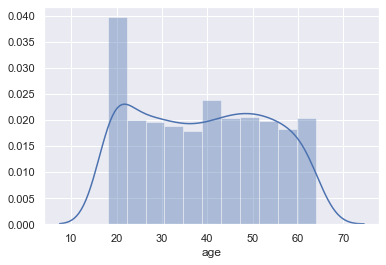

In [6]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.  
sns.distplot(data['age'])

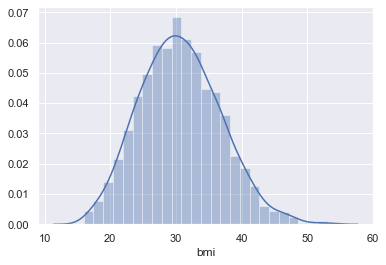

In [7]:
sns.distplot(data['bmi'])

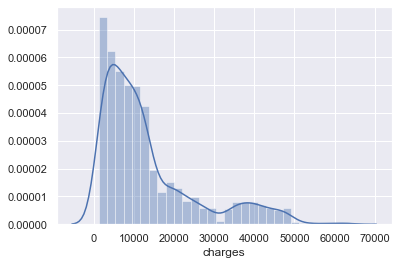

In [8]:
sns.distplot(data['charges'])    # Right skewed

In [9]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’  columns
# skewness along the index axis 
data.skew(axis = 0, skipna = True) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [10]:
data.skew(axis = 1, skipna = True) 

0       1.999989
1       1.998527
2       1.999789
3       1.999991
4       1.999663
          ...   
1333    1.999920
1334    1.999145
1335    1.997910
1336    1.999239
1337    1.999982
Length: 1338, dtype: float64

In [11]:
data.age.skew() 

0.05567251565299186

In [12]:
data.bmi.skew()    # almost normal distributionsince skewness is between -.5 to +.5

0.2840471105987448

In [13]:
data.charges.skew()  #highly skewed since skewness is greater than 1

1.5158796580240388

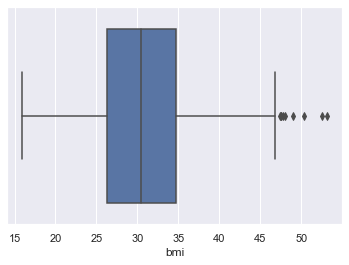

In [14]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and  ‘charges columns
sns.boxplot(data['bmi'])
# value shown in black dots are the outliers



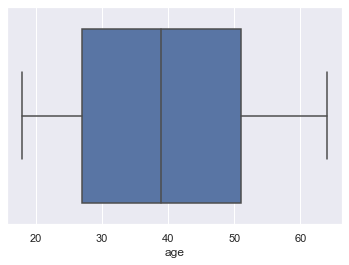

In [15]:
sns.boxplot(data['age'])
# No outliners

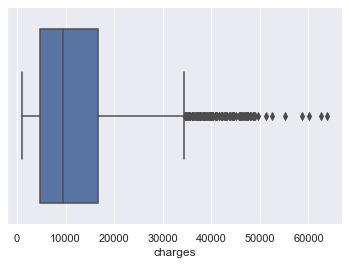

In [16]:
sns.boxplot(data['charges'])
# Right skewed with a considerable about outliner data

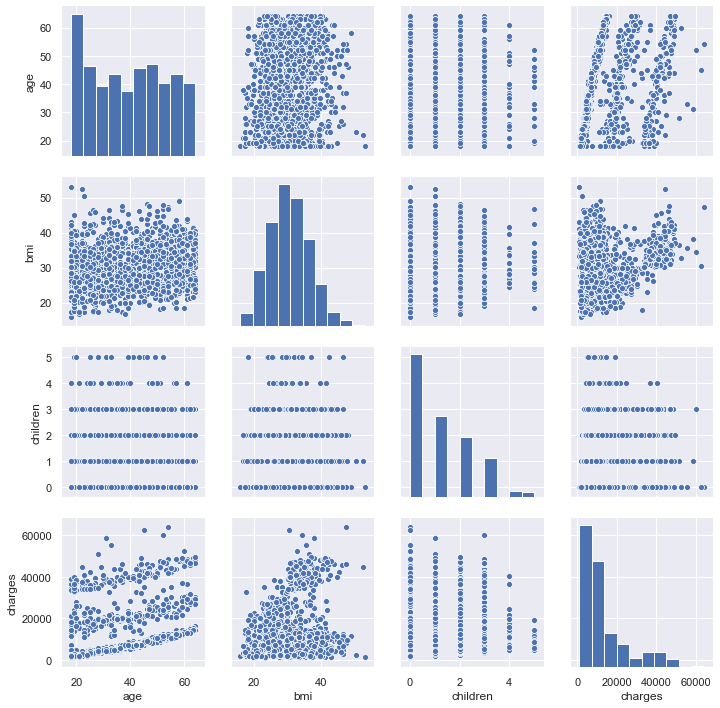

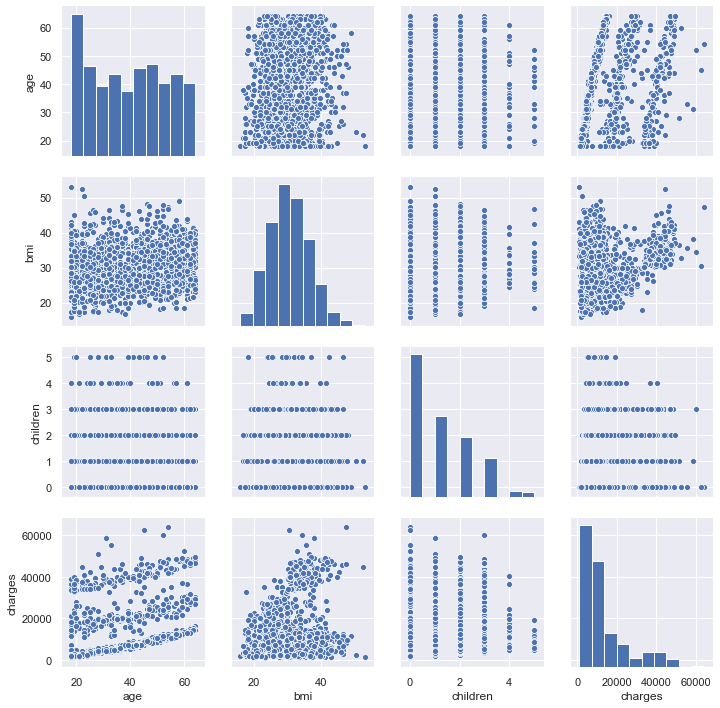

In [17]:
# g Pair plot that includes all the columns of the data  frame 
sns.pairplot(data[['age','bmi', 'children','charges']])
sns.pairplot(data)


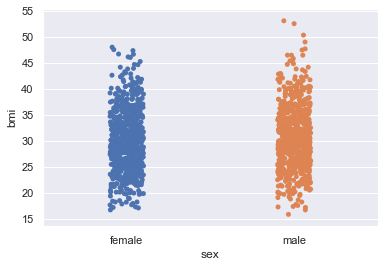

In [18]:
#h. Distribution of categorical columns (include  children)
sns.stripplot(data['sex'], data['bmi'], jitter = True)

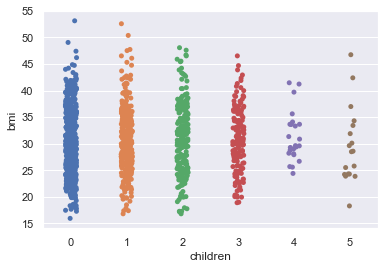

In [19]:
sns.stripplot(data['children'], data['bmi'], jitter = True)


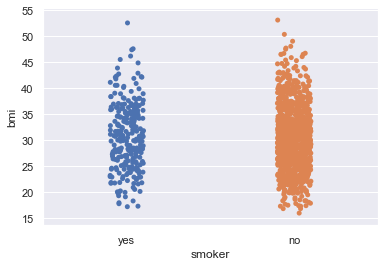

In [20]:
data
sns.stripplot(data['smoker'], data['bmi'], jitter = True)

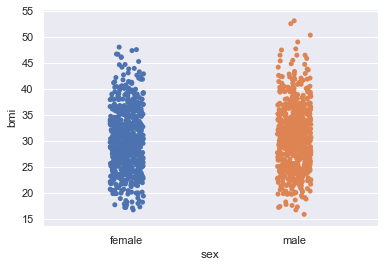

In [21]:
sns.stripplot(data['sex'], data['bmi'], jitter = True)

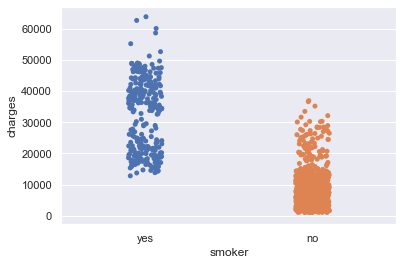

In [22]:
# Questions
#a. Do charges of people who smoke differ significantly  from the people who don't?  
# Ans Yes charges of people who donot smoke is less.
sns.stripplot(data['smoker'], data['charges'], jitter = True)

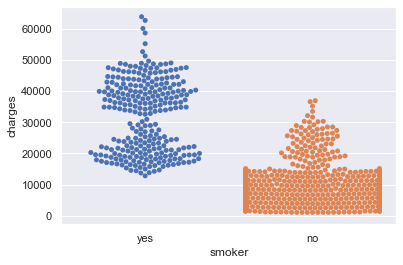

In [23]:
sns.swarmplot(data['smoker'], data['charges'])

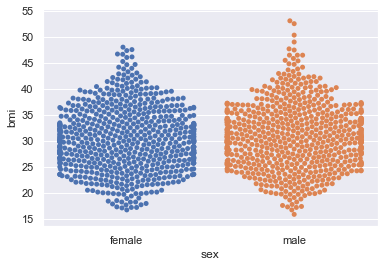

In [24]:
#b. Does bmi of males differ significantly from that of  females?
# Answer The maximum bmi value is greater for male as compared to female, but most of the bmi values are same for both
sns.swarmplot(data['sex'], data['bmi'])

In [25]:
#c. Is the proportion of smokers significantly different  in different genders?
# Answer  yes from the data it is clear that the proportion of smokers is higher in male

In [26]:
print(data[(data['smoker'] == 'yes') & (data['sex'] == 'male')].shape)
print(data[(data['smoker'] == 'no') & (data['sex'] == 'male')].shape)
print(data[(data['smoker'] == 'yes') & (data['sex'] == 'female')].shape)
print(data[(data['smoker'] == 'no') & (data['sex'] == 'female')].shape)

(159, 7)
(517, 7)
(115, 7)
(547, 7)


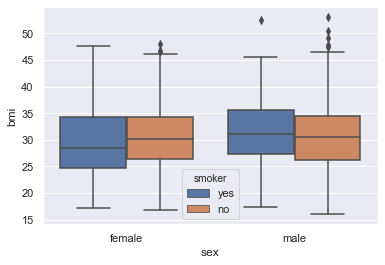

In [27]:
sns.boxplot(data['sex'], data['bmi'], hue = data['smoker'])

In [28]:
# statistical test
# null hypothesis H0 =proportions are equal
# alternate Ha = proportions are not equal

female_smokers = data[data['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = data.sex.value_counts()[1] # number of females in the data
n_males = data.sex.value_counts()[0] #number of males in the data

In [29]:
from statsmodels.stats.proportion import proportions_ztest

t_stats,p_value = proportions_ztest([male_smokers, female_smokers], [n_males, n_females])
print(p_value)    

# Answer since p value is less than 0.05 hence we reject the null hypothesis

0.005324114164320532


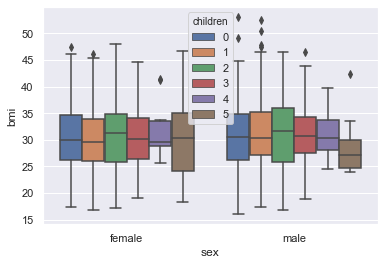

In [30]:
# d.  Is the distribution of bmi across women with no  children, one child and two children, the same ? 
#Answer through all the plots the mean value of bmi for women with any no of children is nearly same. 
#Explicitly if we compare case with 0 child and 4 children there is a significant difference and the maximum value is bmi is also noticed to be low.
# the IQR is same in most of the cases except for women with 5 children.
# SO there is difference in the distribution of bmi across women with different no of children
sns.boxplot(data['sex'], data['bmi'], hue = data['children'])

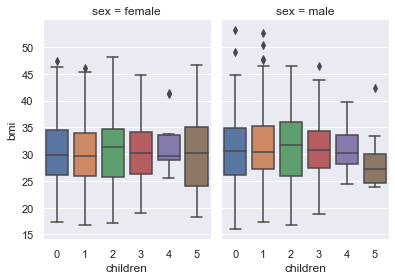

In [31]:
sns.catplot(x="children", y="bmi",
...                 col="sex",
...                 data=data, kind="box",
...                 height=4, aspect=.7);

,age,bmi,children,charges
count,289.000000,289.000000,289.0,289.000000
mean,38.346021,30.361522,0.0,11905.714276
std,16.358335,5.966934,0.0,11471.881191
min,18.000000,17.290000,0.0,1607.510100
25%,22.000000,26.200000,0.0,3171.614900
50%,36.000000,29.925000,0.0,9541.695550
75%,56.000000,34.600000,0.0,14133.037750
max,64.000000,47.410000,0.0,63770.428010


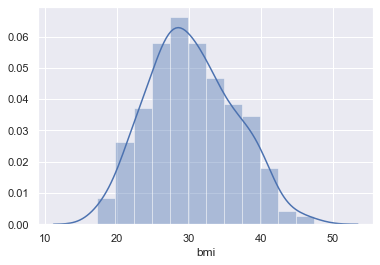

In [32]:
data[(data['sex'] == 'female')].groupby('children') 
newdata = data[(data['sex'] == 'female') & (data['children'] == 0)]
sns.distplot(newdata['bmi'])
newdata.describe()

,age,bmi,children,charges
count,158.000000,158.000000,158.0,158.000000
mean,39.506329,30.052658,1.0,12161.360414
std,11.428954,5.786831,0.0,11071.976512
min,18.000000,16.815000,1.0,2201.097100
25%,30.000000,25.982500,1.0,5046.491400
50%,41.000000,29.567500,1.0,8232.868150
75%,48.000000,33.942500,1.0,14287.374210
max,64.000000,46.090000,1.0,58571.074480


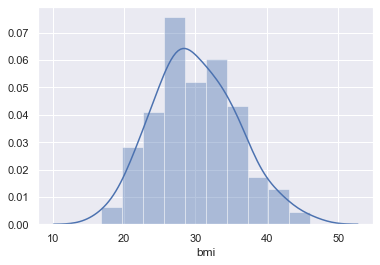

In [33]:
newdata1 = data[(data['sex'] == 'female') & (data['children'] == 1)]
sns.distplot(newdata1['bmi'])
newdata1.describe()

,age,bmi,children,charges
count,119.000000,119.00000,119.0,119.000000
mean,40.512605,30.64979,2.0,13941.317326
std,12.248740,6.62820,0.0,11419.324548
min,18.000000,17.19500,2.0,2801.258800
25%,31.000000,25.77000,2.0,6358.025175
50%,42.000000,31.30000,2.0,10107.220600
75%,50.500000,34.75000,2.0,15649.704400
max,64.000000,48.07000,2.0,47305.305000


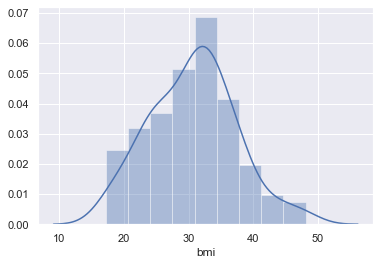

In [34]:
newdata2 = data[(data['sex'] == 'female') & (data['children'] == 2)]
sns.distplot(newdata2['bmi'])
newdata2.describe()

,age,bmi,children,charges
count,77.000000,77.000000,77.0,77.000000
mean,42.181818,30.436429,3.0,13865.605066
std,12.190081,5.832741,0.0,10082.632667
min,18.000000,19.000000,3.0,4234.927000
25%,33.000000,26.315000,3.0,7151.092000
50%,41.000000,30.210000,3.0,11085.586800
75%,53.000000,34.105000,3.0,16420.494550
max,64.000000,44.700000,3.0,46661.442400


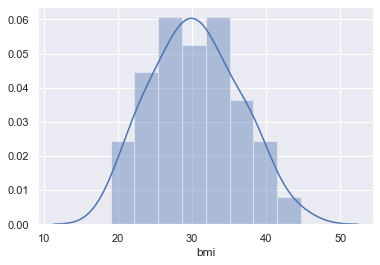

In [35]:
newdata3 = data[(data['sex'] == 'female') & (data['children'] == 3)]
sns.distplot(newdata3['bmi'])
newdata3.describe()

,age,bmi,children,charges
count,11.000000,11.000000,11.0,11.000000
mean,42.000000,31.943182,4.0,13937.674562
std,13.461055,5.190395,0.0,9299.624881
min,18.000000,25.600000,4.0,4561.188500
25%,32.500000,28.912500,4.0,9110.509950
50%,48.000000,29.640000,4.0,11033.661700
75%,49.500000,33.515000,4.0,15111.609940
max,61.000000,41.470000,4.0,36580.282160


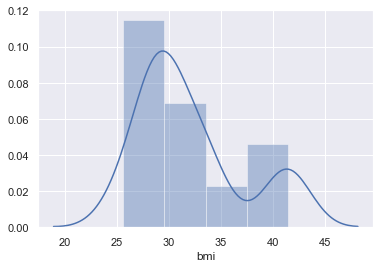

In [36]:
newdata4 = data[(data['sex'] == 'female') & (data['children'] == 4)]
sns.distplot(newdata4['bmi'])
newdata4.describe()

,age,bmi,children,charges
count,8.000000,8.000000,8.0,8.000000
mean,37.000000,30.620625,5.0,9854.006419
std,11.940328,8.932533,0.0,4634.832072
min,19.000000,18.300000,5.0,4687.797000
25%,34.250000,24.136250,5.0,7644.384225
50%,39.000000,30.250000,5.0,8781.311775
75%,41.500000,34.990000,5.0,11812.811625
max,52.000000,46.750000,5.0,19023.260000


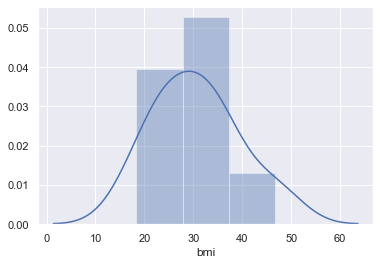

In [37]:
newdata5 = data[(data['sex'] == 'female') & (data['children'] == 5)]
sns.distplot(newdata5['bmi'])
newdata5.describe()

In [40]:
# statistical tests
femaledata = data[(data['sex'] == 'female')]

print(femaledata.children.value_counts())
print(femaledata.shape)

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64
(662, 7)


In [41]:
onechildbmi = femaledata[femaledata['children'] == 0].bmi
twochildbmi = femaledata[femaledata['children'] == 1].bmi
threechildbmi = femaledata[femaledata['children'] == 2].bmi
fourchildbmi = femaledata[femaledata['children'] == 3].bmi
fivechildbmi = femaledata[femaledata['children'] == 4].bmi

v1, v2, v3, v4, v5 = np.var(onechildbmi), np.var(twochildbmi), np.var(threechildbmi), np.var(fourchildbmi), np.var(fivechildbmi)
print(v1, v2,v3,v4,v5)

35.48110581350798 33.27546793382471 43.563849325612594 33.579042115027825 24.491092148760323


In [ ]:
# Clearly there is a variation in bmi in females with different no of children

#H0  there is no change in female bmi with respect to no of children
# Ha there is variation in female bmi with respect to no of children

n = 662
dof = n-1
alpha = 0.05

chi = (dof*v1)/v2
chi

# doubt how to calculate chi_critical
# how to compare variance of women with different count of kids